<a href="https://colab.research.google.com/github/Aarushi5g/Data-Analytics/blob/main/World_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyzing Happiness around the Globe for the year 2020**

The happiness scores and rankings use data from the Gallup World Poll. 
The columns following the happiness score estimate the extent to which each of six factors – GDP, social support, life expectancy, freedom, corruption, and generosity.

In [ ]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from seaborn import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import plotly.express as px
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import KFold

In [ ]:
# Load the data for year 2020, leaving some unwanted columns out
wh_2020 = pd.read_csv('/content/2020.csv', usecols = range(12))

# Preview the data
wh_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [ ]:
print("Our data has {} rows (observations/countries) and {} columns.".format(wh_2020.shape[0], wh_2020.shape[1]))

Our data has 153 rows (observations/countries) and 12 columns.


### **Cleaning/Modifying the Data**

**Renaming Columns**

In [ ]:
# Rename the column names for simplicity

col_names_dict = {'Country name':'Country', 
                  'Regional indicator':'Region', 
                  'Ladder score': 'Ladder',
                  'Standard error of ladder score':'Standard Error', 
                  'Logged GDP per capita':'Logged GDPPC',
                  'Social support':'Social Support', 
                  'Healthy life expectancy':'Life Expectancy',
                  'Freedom to make life choices':'Freedom', 
                  'Perceptions of corruption': 'Corruption'}

wh_2020.rename(columns = col_names_dict, inplace = True)
wh_2020.head()

,Country,Region,Ladder,Standard Error,upperwhisker,lowerwhisker,Logged GDPPC,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


**Missing Values**

In [ ]:
# Check for any missing values in the data
wh_2020.isnull().sum()

Country            0
Region             0
Ladder             0
Standard Error     0
upperwhisker       0
lowerwhisker       0
Logged GDPPC       0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

**Adding a Column to the Data**

In [ ]:
# Adding a 'Rank' column to our data (ordered from happiest to unhappiest)
wh_2020['Rank'] = range(1, 154)

wh_2020.head()

,Country,Region,Ladder,Standard Error,upperwhisker,lowerwhisker,Logged GDPPC,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Rank
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,2
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,3
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,4
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,5


In [ ]:
# Set font sizes for all of our plots
plt.rc('font', size = 14)
plt.rc('axes', labelsize = 16)
plt.rc('legend', fontsize = 18)
plt.rc('axes', titlesize = 24)
plt.rc('figure', titlesize = 24)

# Set style
plt.style.use('seaborn-whitegrid')

**Average Rank for Each Region**

In [ ]:
print("Table of Average Rank for Each Region:\n")
print(wh_2020.groupby('Region')['Rank'].agg('mean'))

Table of Average Rank for Each Region:

Region
Central and Eastern Europe             58.294118
Commonwealth of Independent States     82.583333
East Asia                              66.833333
Latin America and Caribbean            52.380952
Middle East and North Africa           89.117647
North America and ANZ                  12.250000
South Asia                            111.285714
Southeast Asia                         81.000000
Sub-Saharan Africa                    121.871795
Western Europe                         22.523810
Name: Rank, dtype: float64


There a couple of pretty clear patterns we can see here. For example, Western Europe, North America, and Latin America all seem to be places where happiness is quite high, whereas places like South Asia and Sub-Saharan Africa appear to be quite unhappy.

**Top 10 happiest countries**

In [ ]:
import plotly.express as px

df_top=wh_2020.head(10).sort_values('Ladder', ascending = True)
px.bar(df_top, x='Ladder', y='Country',orientation='h',title="Top 10 happiest countries",color_discrete_sequence =['pink']*len(df_top))

**Least 10 happiest countries**

In [ ]:
df_least = wh_2020[-10:].sort_values('Ladder', ascending = True)
px.bar(df_least, x='Ladder', y='Country',orientation='h',title="Least 10 happiest countries",color_discrete_sequence =['pink']*len(df_least))

### **Countries' Happiness Score According to the Region**

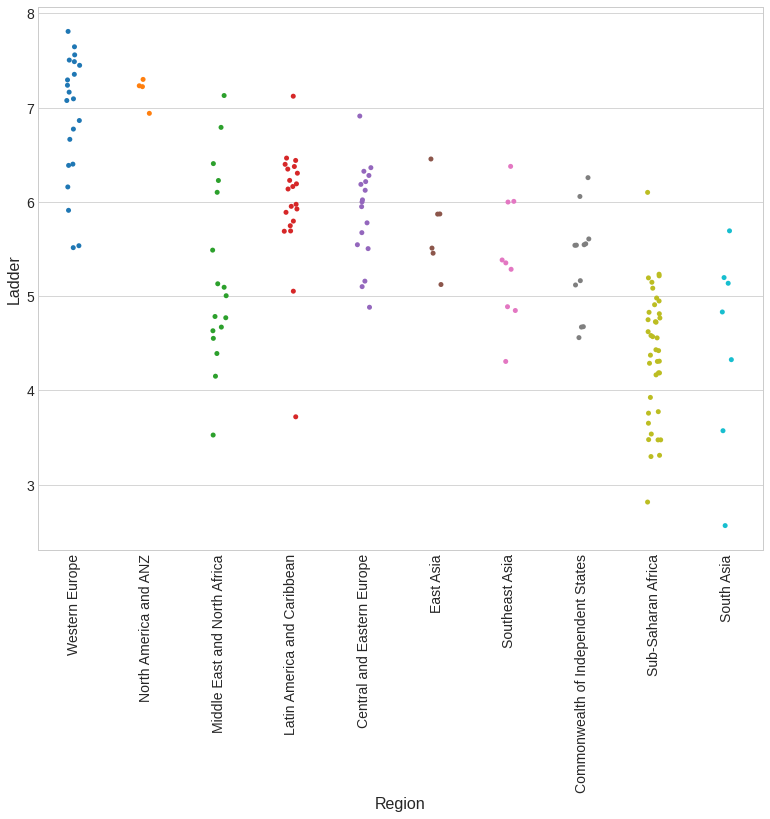

In [ ]:
x = sns.stripplot(x = "Region", y = "Ladder", data = wh_2020, jitter = True)
plt.xticks(rotation = 90)
plt.show()

**Correlation Matrix**



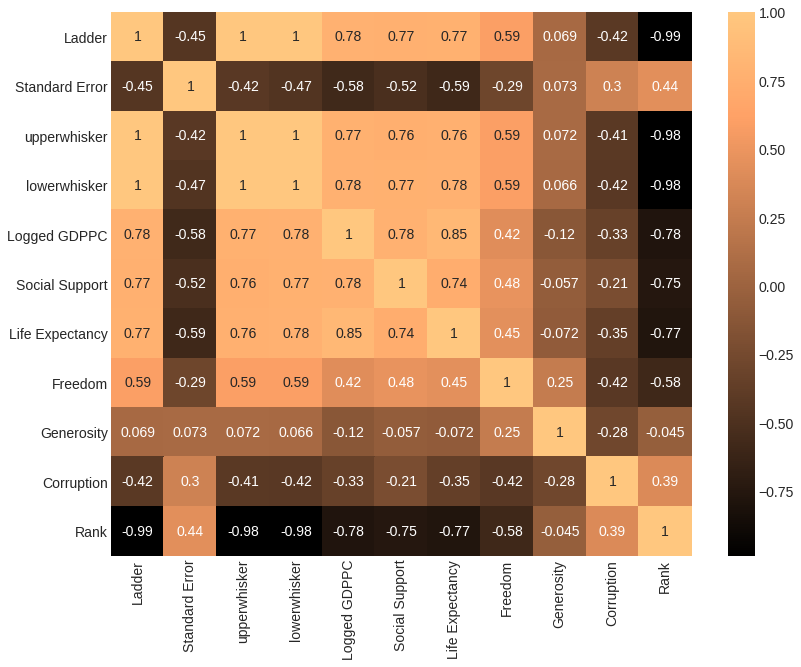

In [ ]:
plt.rcParams['figure.figsize'] = (13, 10)
sns.heatmap(wh_2020.corr(), cmap = 'copper', annot = True)

plt.show()

It looks like the Logged GDPPC, Social Support, and Life Expectancy metrics all have a relatively high correlation with the overall score a country received. Also, these factors each seem to have a pretty high correlation with each other (e.g., Social Support is well correlated with Life Expectancy, and so on). On the other end of the spectrum, Generosity does not seem to have a sizeable correlation with any other measurement, including the Ladder score.

**Plot and Visulaize Top 10 Countries for Each Feature**

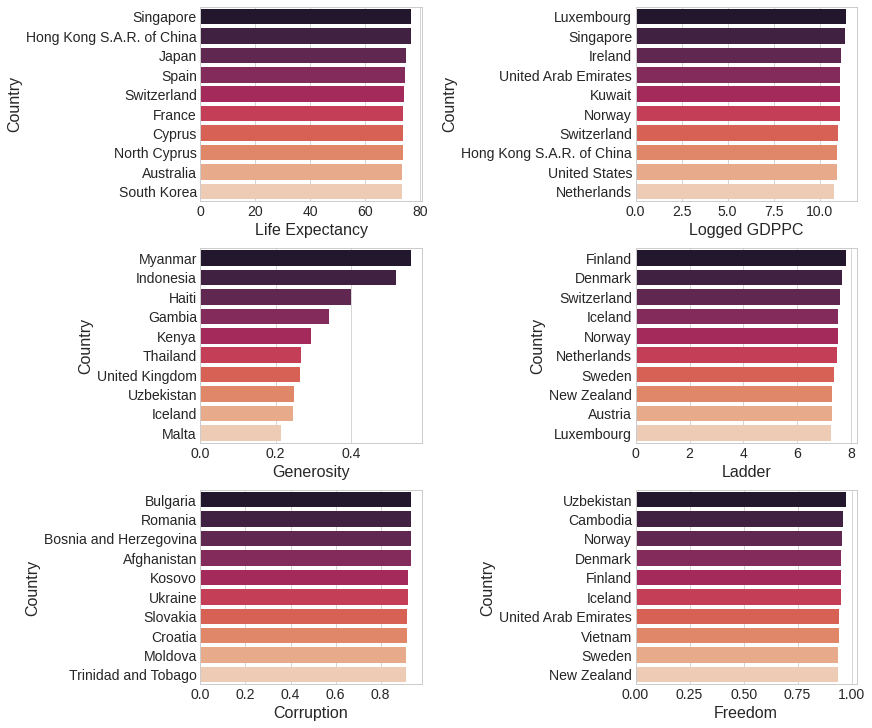

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,10))
sns.barplot(x='Logged GDPPC',y='Country',
                        data=wh_2020.nlargest(10,'Logged GDPPC'),
                        ax=axes[0,1],palette="rocket")
sns.barplot(x='Life Expectancy' ,y='Country',
                        data=wh_2020.nlargest(10,'Life Expectancy'),
                        ax=axes[0,0],palette="rocket")
sns.barplot(x='Ladder' ,y='Country',
                        data=wh_2020.nlargest(10,'Ladder'),
                        ax=axes[1,1],palette="rocket")
sns.barplot(x='Generosity' ,y='Country',
                        data=wh_2020.nlargest(10,'Generosity'),
                        ax=axes[1,0],palette="rocket")
sns.barplot(x='Freedom' ,y='Country',
                        data=wh_2020.nlargest(10,'Freedom'),
                        ax=axes[2,1],palette="rocket")
sns.barplot(x='Corruption' ,y='Country',
                        data=wh_2020.nlargest(10,'Corruption'),
                        ax=axes[2,0],palette="rocket")

## **Linear Regression**

2020 The r-squared score for the Test model using only quantitative variables was 0.674421820488148 on 31 values.
2020 The r-squared score for the Train model using only quantitative variables was 0.7573336351979258 on 122 values.


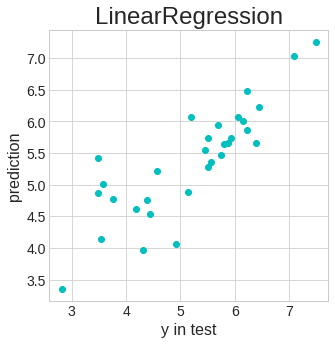

In [ ]:
def lmmodel(df):
    '''
    INPUT - DataFrame
    OUTPUT - Returns 
    r2 score for Test Dataset 
    Length of Test Datset
    r2 score for Train Dataset
    Length of Train Dataset
    '''
    #Choosing X and Y columns Y- Happiness Score which needs to be Predicted X - Features to Train Model
    y=df['Ladder']
    X=df[['Logged GDPPC', 'Social Support', 'Life Expectancy','Freedom', 'Generosity',
           'Corruption']]
    
    #Splitting Test and Train Dataset
    X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2, shuffle=True, random_state=1000)
    
    #Initiating Linear Regression Model
    lin_reg = LinearRegression()
    
    #Fit the Model
    lin_reg.fit(X_train,Y_train)
    
    #Predict the Happiness Score for Test and Train Dataset
    y_test_preds = lin_reg.predict(X_test)
    y_train_preds = lin_reg.predict(X_train)
    
    #Finding Score, Mean Squared Error and Mean Absolute Error
    score = lin_reg.score(X_test, Y_test)
    mse = mean_squared_error(Y_test, y_test_preds)
    mae = mean_absolute_error(Y_test, y_test_preds)
    
    #R2 Score for Model
    r2_test = r2_score(Y_test, y_test_preds)
    r2_train = r2_score(Y_train, y_train_preds) 
    
    #Length of Test and Train Dataset
    len_ytest = len(y_test_preds)
    len_ytrain = len(y_train_preds)
     
    fig = plt.subplots(figsize=(5,5))
    plt.scatter(Y_test,y_test_preds,color='c')
    plt.xlabel('y in test')
    plt.ylabel('prediction')
    plt.title('LinearRegression')
    
    return r2_test, len_ytest, r2_train, len_ytrain
    #return score, mse, mae


#Predicting Happiness Score for 2020 Dataset by using lmmodel Function

r2_test, len_ytest, r2_train, len_ytrain = lmmodel(wh_2020)
print("2020 The r-squared score for the Test model using only quantitative variables was {} on {} values.".format(r2_test, len_ytest))
print("2020 The r-squared score for the Train model using only quantitative variables was {} on {} values.".format(r2_train, len_ytrain))



In [ ]:
# LINEAR REGRESSION
y=wh_2020['Ladder']
X=wh_2020[['Logged GDPPC', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 
          'Corruption']] 

#Splitting Test and Train Dataset
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2, shuffle=True, random_state=13579)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_hat = lin_reg.predict(X_test)
score=lin_reg.score(X_test, Y_test)
mse = mean_squared_error(Y_test, y_hat)
mae = mean_absolute_error(Y_test, y_hat)
r2 = r2_score(Y_test, y_hat)
r2, mse

(0.6377875818477291, 0.458728943242416)

## **Decision Tree Regression**

Text(0.5, 1.0, 'DecisionTreeRegressor')

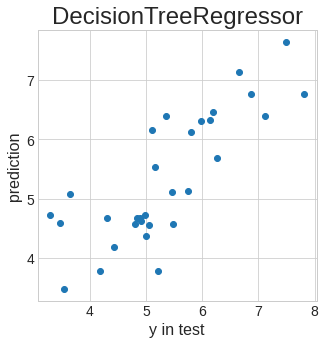

In [ ]:
#Decision Tree Regression
dtr= DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred = dtr.predict(X_test)
test_mse = mean_squared_error(Y_test, y_pred)
y_pred_train = dtr.predict(X_train)
train_mse = mean_squared_error(Y_train, y_pred_train)
d=dtr.score(X_test, Y_test)
d, test_mse 
fig = plt.subplots(figsize=(5,5))
plt.scatter(Y_test,y_pred)
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('DecisionTreeRegressor')

## **Random Forest Regression**

Text(0.5, 1.0, 'RandomForestRegressor')

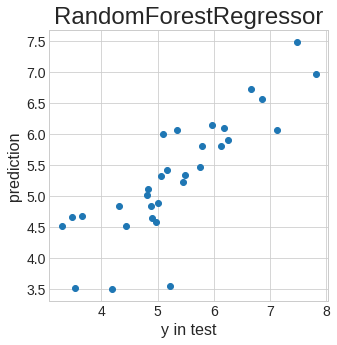

In [ ]:
#Random Forest Regression
rf = RandomForestRegressor(n_estimators = 13579)
rf.fit(X_train, Y_train)
y_hat = rf.predict(X_test)
errors = abs(y_hat - Y_test)
acc = 1 - errors
c=rf.score(X_test, Y_test)
c, np.mean(acc)
fig = plt.subplots(figsize=(5,5))
plt.scatter(Y_test,y_hat)
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('RandomForestRegressor')

**K-Nearest Neighbour(KNN)Algorithm**

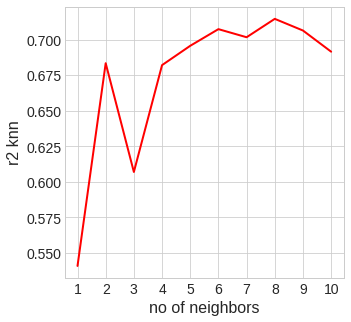

0.6957407333753457


In [ ]:
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,11,1)
score_list=[]
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(X_train,Y_train)
    y_pred=regressor_knn.predict(X_test)
    score_list.append(r2_score(Y_test,y_pred))
fig = plt.subplots(figsize=(5,5))
plt.plot(knnRange,score_list,linewidth=2,color='red')
plt.xticks(knnRange)
plt.xlabel('no of neighbors')
plt.ylabel('r2 knn')
plt.show()

#K-Nearest Neighbour
regressor_knn= KNeighborsRegressor (n_neighbors=5)
regressor_knn.fit(X_train,Y_train)
y_pred=regressor_knn.predict(X_test)
r2_sc=r2_score(Y_test,y_pred)
print(r2_sc)

## **Decision Tree with K fold**

In [ ]:
#Decision Tree with K fold
folds = KFold(n_splits=5, shuffle=True, random_state=13579)
score = 0
Y_train = pd.DataFrame(data=Y_train, columns = {"Ladder"})
X_train = pd.DataFrame(data=X_train, columns = {'Logged GDPPC', 'Social Support','Life Expectancy', 'Freedom', 'Generosity', 
                                                'Corruption'})
for i, (x_index, y_index) in enumerate(folds.split(X_train, Y_train['Ladder'])):
    print('-' * 22, i, '-' * 22)
    dtr= DecisionTreeRegressor()
    dtr.fit(X_train.iloc[x_index], Y_train['Ladder'].iloc[x_index])
    score += dtr.score(X_train.iloc[y_index], Y_train['Ladder'].iloc[y_index])
    print('score ', dtr.score(X_train.iloc[y_index], Y_train['Ladder'].iloc[y_index]))
    
b = score / folds.n_splits    
print('Average Accuracy', score / folds.n_splits)


---------------------- 0 ----------------------
score  0.7630953602408833
---------------------- 1 ----------------------
score  0.5223622569293007
---------------------- 2 ----------------------
score  0.5748533206567126
---------------------- 3 ----------------------
score  0.5564765454949583
---------------------- 4 ----------------------
score  0.3828057468700032
Average Accuracy 0.5599186460383716


## **Random Forest with K-fold**

In [ ]:
#Random Forest with K-fold
folds = KFold(n_splits=5, shuffle=True, random_state=13579)
score = 0
#Y_train = pd.DataFrame(data=Y_train, columns = {"Happiness Score"})
#X_train = pd.DataFrame(data=X_train, columns = {'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
#'Trust (Government Corruption)'})
for i, (x_index, y_index) in enumerate(folds.split(X_train, Y_train['Ladder'])):
    print('-' * 22, i, '-' * 22)
    rfr = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    rfr.fit(X_train.iloc[x_index], Y_train['Ladder'].iloc[x_index])
    score += rfr.score(X_train.iloc[y_index], Y_train['Ladder'].iloc[y_index])
    print('score ', rfr.score(X_train.iloc[y_index], Y_train['Ladder'].iloc[y_index]))
    
a = score / folds.n_splits
print('Average Accuracy', a)



---------------------- 0 ----------------------
score  0.8129694439848782
---------------------- 1 ----------------------
score  0.7854047785056975
---------------------- 2 ----------------------
score  0.7949667164125016
---------------------- 3 ----------------------
score  0.7527686965117728
---------------------- 4 ----------------------
score  0.566736545922914
Average Accuracy 0.7425692362675529


## **Score Comparison Among Different Regression Models**

In [ ]:
#Score Comparison Among Different Regression Models

labelList = ['Linear Regression','K-Neigbors Regression', 'Random Forest', 'Random Forest with K-fold','Decision Tree','Decision Tree with K-fold']
mylist = [r2, r2_sc, c, a, d, b]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[63.779, 69.574, 70.268, 74.257, 62.081, 55.992]


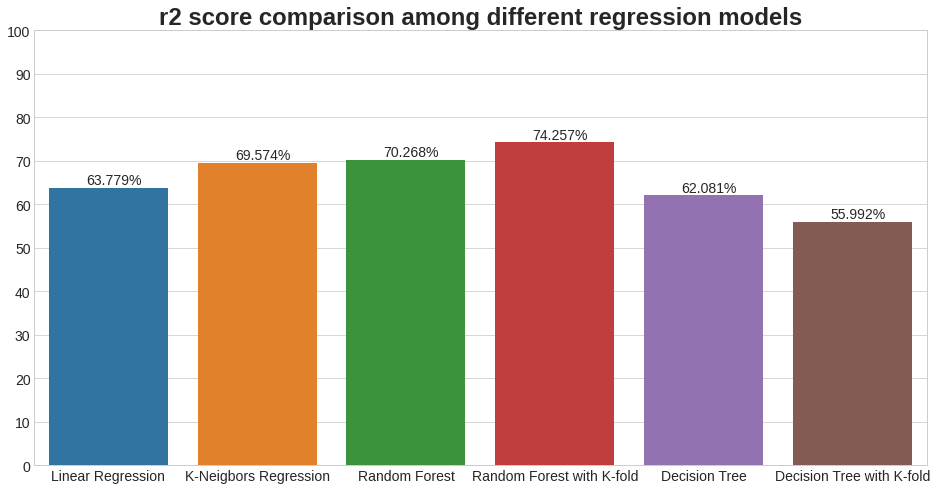

In [ ]:
#Plt comparison
plt.figure(figsize=(16,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()

### **Happiness scores of countries based on regions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



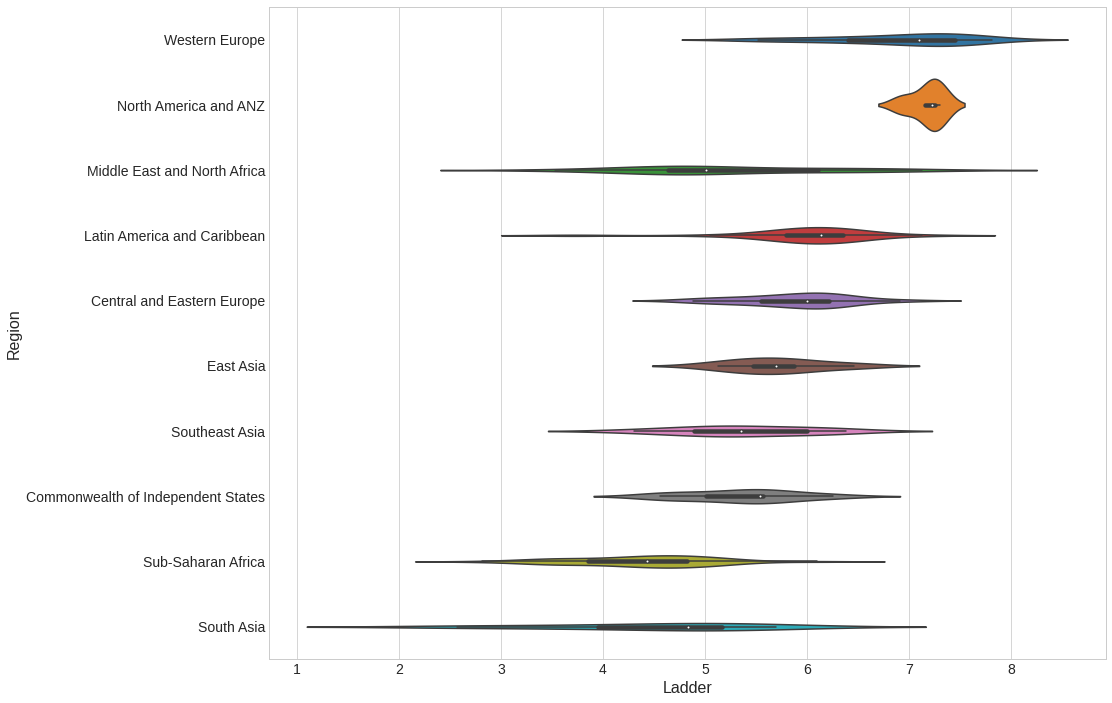

In [ ]:
# happiness score vs continents

plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(wh_2020['Ladder'], wh_2020['Region'])
plt.show()

## **Happiness Score Across The World**

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = wh_2020['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = wh_2020['Ladder'], 
           text = wh_2020['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

## **Comparing all factors with Happiness score**



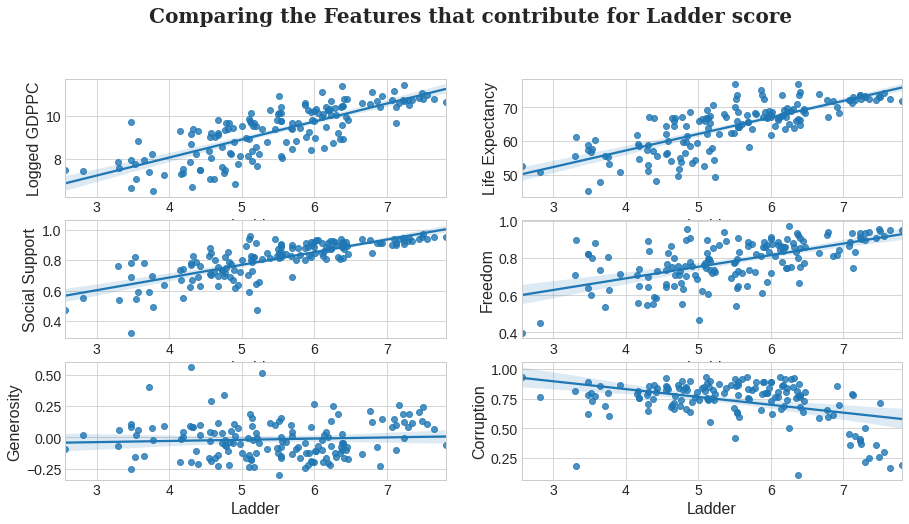

In [ ]:
# check the fields contributing to happiness index

df2=wh_2020[['Country', 'Region', 'Ladder',
        'Logged GDPPC', 'Social Support', 'Life Expectancy',
       'Freedom', 'Generosity',
       'Corruption']]
cols=df2.corr()['Ladder'].sort_values(ascending=False)
fig=plt.figure(figsize=(15,10))
plt.suptitle("Comparing the Features that contribute for Ladder score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=df2, x='Ladder',y=i)
    ax.legend('')
    j=j+1
    
plt.legend('')

## **Hypothesis testing for Regions**

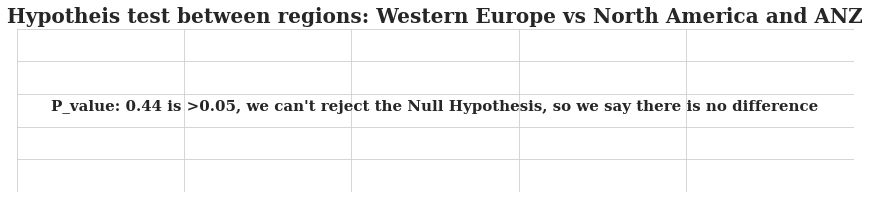

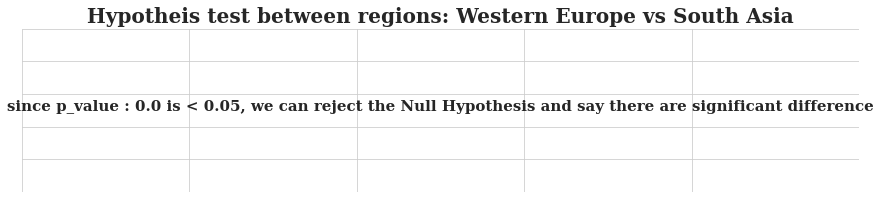

In [ ]:
#Hypothesis testing for Regions
#Is there a significant difference in between Two Regions
#Ho = There is no significant difference
#H1 = There are signifcant difference

from scipy.stats import ttest_ind, wilcoxon, ttest_rel
def hypo_test(reg1,reg2):

    r1 = wh_2020[wh_2020['Region']==reg1]['Ladder']
    r2 = wh_2020[wh_2020['Region']==reg2]['Ladder']
    t1="Hypotheis test between regions: {} vs {}".format(reg1,reg2)
    stats, p_value= ttest_ind(r1, r2)
    
    if p_value <0.05:
        t2="since p_value : {} is < 0.05, we can reject the Null Hypothesis and say there are significant difference".format(np.round(p_value,3))
    else:
        t2="P_value: {} is >0.05, we can't reject the Null Hypothesis, so we say there is no difference".format(np.round(p_value,3))

    fig=plt.figure(figsize=(15,3))
    plt.title(t1,family='Serif', weight='bold', size=20)
    plt.text(x=plt.xlim()[1]/2,y=plt.ylim()[1]/2,s=t2,ha='center', family='Serif', weight='bold', size=15)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    return

reg=wh_2020['Region'].unique()
hypo_test(reg[0],reg[1])
hypo_test(reg[0],reg[-1])

**Observation:**


*   Most of the Asian and African countries have low happiness scores.
*   American countries have comparitively better happiness scores.
*   North America & western europe have highest happiness score.

**Conclusion:**

From the extensive analysis on happiness scores for the countries we can conclude that the happiness of citizens in the country depends on the efficiency of the government which includes GDPPC, corruption, freedom provided. Healthy life expectancy also significantly influences the happiness of citizens.

Also, countries having good Healthly life, Social support, Freedom to make life choised, less corruptions, good per capita income have high happiness index.